## Building a machine learning project


  ## 1. Aim
  We will take data and predict whether the refrance has a Heart disease or not.
  ## 2.Data
  The data surveyed here is from:- https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
  ## 3.Evaluation
  If the accuracy is more than __% the the project can be carried on
  
  ## 4.Features
  **Data dictonary**
  
  *age in years
  
  *sex (1 = male; 0 = female)
  
  *cp (chest pain)
  
  *trestbps = trestbpsresting blood pressure in ml Hg
  
  *cho = cholserum cholestoral in mg/di
  
  *fbs = (fasting blood sugar > 120 mg/dl) (1=TRUE: 0=FALSE)
  
  *restecg = restecgresting electrocarariograpic results
  
  *thalach = thalchmaximum heart rate  achieved
  
  *exang = exchangexercise induced angina (1=True: 0=False)
  
  *oldpeak = oldpeakST depressioin induced by exercise relative to rest
  
  *slope = slope of th peak excersise ST segment
  
  *ca = cannumber of the major vessels (0-3) colored by flourosopy
  
  *thal = thal13(normal); (6 = fixed defect); (7 = reversable defect)
  
  *target = 1 or 0 

## Importing all tools that are needed

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

## Importing data

In [4]:
data = pd.read_csv("21882974-heart-disease.csv")

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
len(data["target"])

303

In [7]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

* We have 165 with and 138 without Heart disease

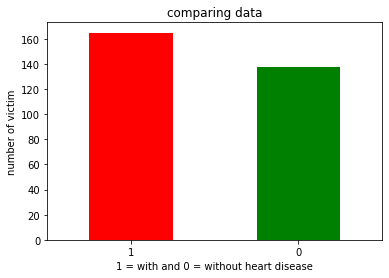

In [8]:
data["target"].value_counts().plot(kind="bar", xlabel="1 = with and 0 = without heart disease", ylabel="number of victim", title="comparing data", color=["red", "green"])
plt.xticks(rotation=0);                                

* Finding any missing values

In [9]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# We don't have any missing values for the data

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


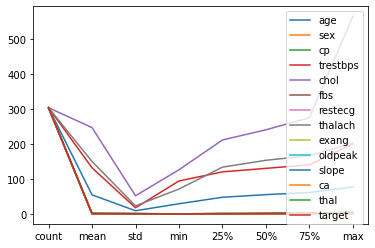

In [12]:
data.describe().plot();

In [13]:
# so there is 1 float and rest are int type

data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* comparing some data
* oldpeak, age, thal, threstbps

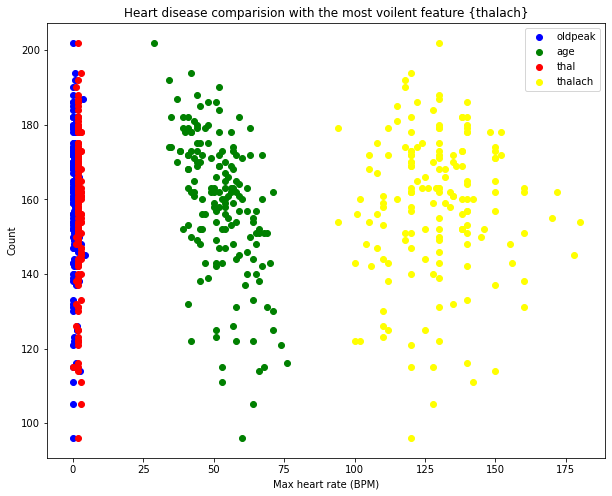

In [14]:
plt.figure(figsize=(10, 8))
plt.scatter(data.oldpeak[data.target==1],
            data.thalach[data.target==1],
            c="blue")
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],
            c="green")
plt.scatter(data.thal[data.target==1],
            data.thalach[data.target==1],
            c="red")
plt.scatter(data.trestbps[data.target==1],
            data.thalach[data.target==1],
            c="yellow")
plt.title("Heart disease comparision with the most voilent feature {thalach}")
plt.xlabel("Max heart rate (BPM)")
plt.ylabel("Count")
plt.legend(["oldpeak", "age", "thal", "thalach"]);

# Comparing chol

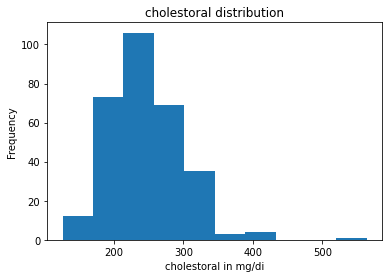

In [15]:
data.chol.plot.hist()
plt.xlabel("cholestoral in mg/di")
plt.title("cholestoral distribution");

# Comparing cp and exang

In [16]:
cp_x = pd.crosstab(data.cp, data.target)
exang_x = pd.crosstab(data.exang, data.target)

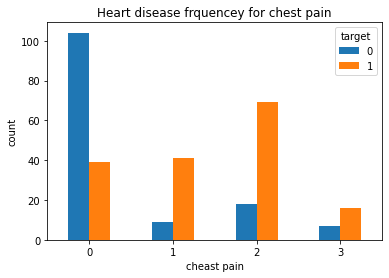

In [17]:
cp_x.plot(kind="bar")
plt.title("Heart disease frquencey for chest pain")
plt.xlabel("cheast pain")
plt.ylabel("count")
plt.xticks(rotation=0);


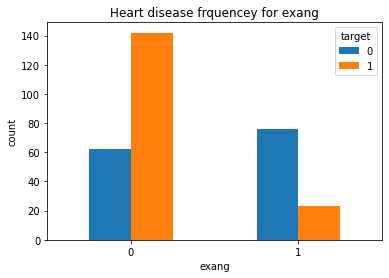

In [18]:
exang_x.plot(kind="bar")
plt.title("Heart disease frquencey for exang")
plt.xlabel("exang")
plt.ylabel("count")
plt.xticks(rotation=0);

In [19]:
# corelation matrix

core_data = data.corr()
core_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


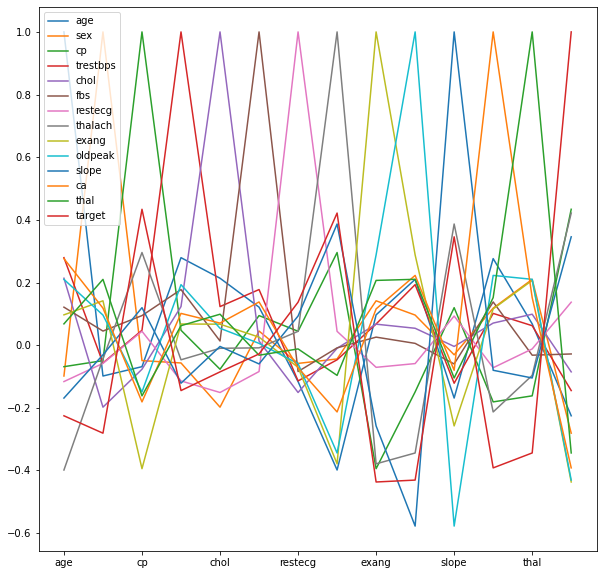

In [20]:
# gives us corelation between diffrent features 

core_data.plot(figsize=(10, 10));

* Heatmap (below two figures) tells us how diffrent distributions are done with diffrent color 

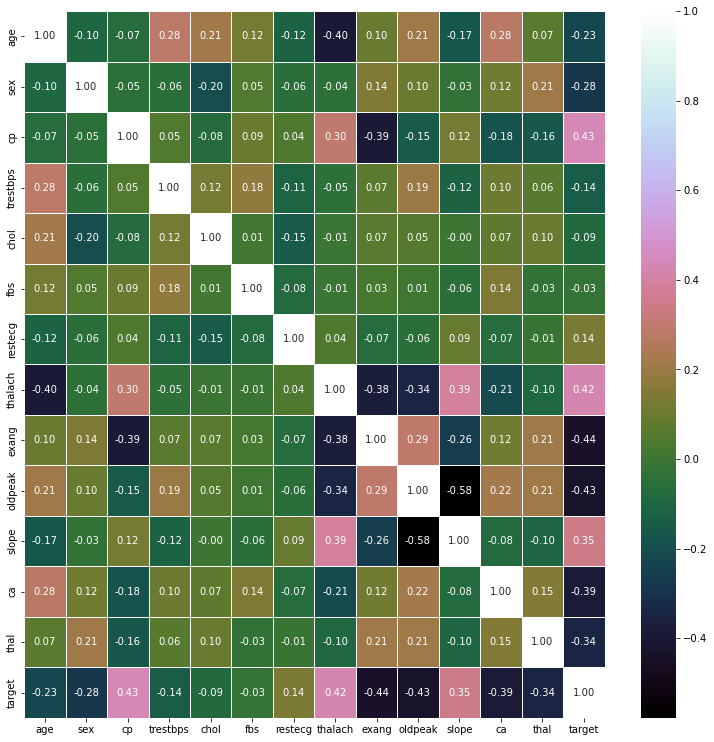

In [21]:
# plotting a better graph to understand efficently

fig, ax=plt.subplots(figsize=(13, 13))
ax=sns.heatmap(core_data,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="cubehelix");
plt.xticks(rotation=0);


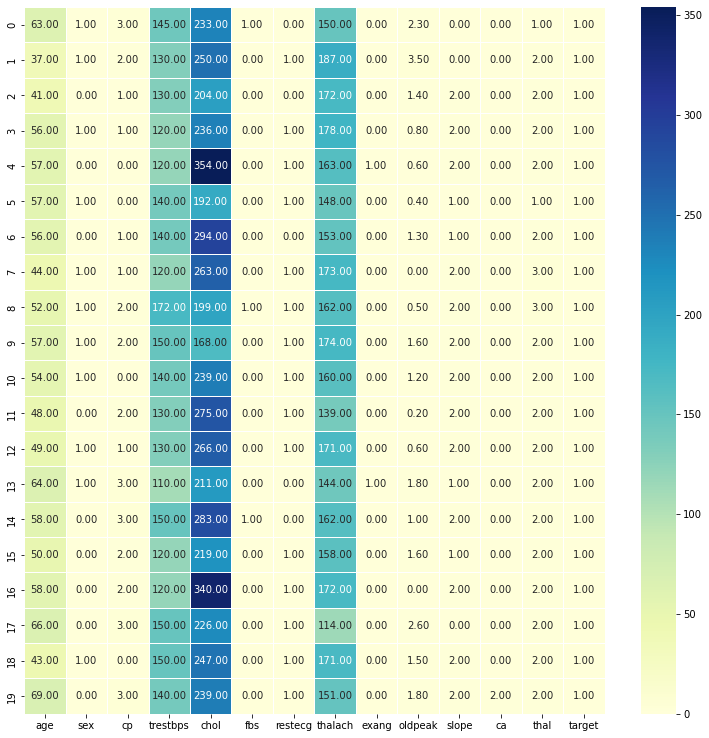

In [22]:
# comparing first 20 readings in data

fig, ax=plt.subplots(figsize=(13, 13))
ax=sns.heatmap(data[:20],
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
plt.xticks(rotation=0);

## 5.Modelling

In [46]:
# splitting data in x and y
x = data.drop("target", axis=1)
y = data["target"]

# splitting data in train and test
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [47]:
# checking training data
x_train.head(7), x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 132 to 102
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 26.5 KB


(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 132   42    1   1       120   295    0        1      162      0      0.0   
 202   58    1   0       150   270    0        0      111      1      0.8   
 196   46    1   2       150   231    0        1      147      0      3.6   
 75    55    0   1       135   250    0        0      161      0      1.4   
 176   60    1   0       117   230    1        1      160      1      1.4   
 59    57    0   0       128   303    0        0      159      0      0.0   
 93    54    0   1       132   288    1        0      159      1      0.0   
 
      slope  ca  thal  
 132      2   0     2  
 202      2   0     3  
 196      1   0     2  
 75       1   0     2  
 176      2   2     3  
 59       2   1     2  
 93       2   1     2  ,
 None)

In [48]:
y_train.head(7), y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 242 entries, 132 to 102
Series name: target
Non-Null Count  Dtype
--------------  -----
242 non-null    int64
dtypes: int64(1)
memory usage: 3.8 KB


(132    1
 202    0
 196    0
 75     1
 176    0
 59     1
 93     1
 Name: target, dtype: int64,
 None)

In [53]:
# creating model (model will be classification as we have to predict 1 or 0{yes, or no})
# so we are trying 2-3 diffrent models and selecting the best one 
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}
# A function for fitting and modeling
def fit_score(models, x_train, x_test, y_train, y_test):
    """
    fit and evaluate model
    x_train:traing data without labels
    x_test:testing data without labels
    y_train:traing data with labels
    y_test:testing data with labels
    """
    np.random.seed(42)
    model_score={}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_score[name] = model.score(x_test, y_test)
    return model_score
model_score = fit_score(models=models, x_train=x_train, x_test=x_test, y_train=y_train, y_test=y_test)
model_score




C:\Users\Ankur\JNb\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

As we can see "lOGISTIC REGRESSION" has the best result (0.8852459016393442)


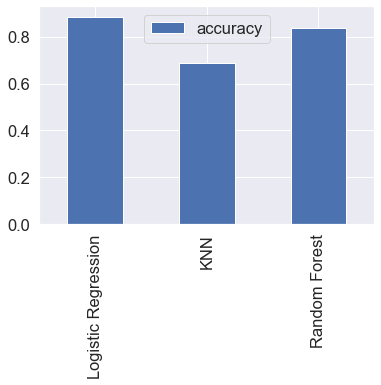

In [328]:
# comparing diffrent models to get best one 
mod_comp = pd.DataFrame(model_score, index=["accuracy"])
mod_comp.T.plot.bar();
print('As we can see "lOGISTIC REGRESSION" has the best result (0.8852459016393442)')

 ## Hyperparameters tuning by hand

In [62]:
train_scores = []
test_scores = []
neighbors = range(1, 21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train, y_train)
    k=knn.score(x_train, y_train)
    n=knn.score(x_test, y_test)
    train_scores.append(k)
    test_scores.append(n)

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
train_scores

In [63]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

max test score 75.41


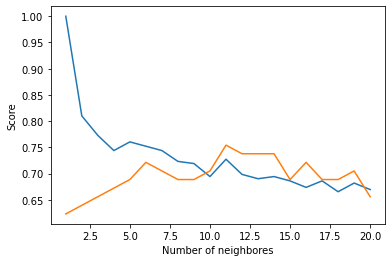

In [69]:
plt.plot(neighbors, train_scores, label="Traing model with diffrent params knn")
plt.plot(neighbors, test_scores, label="Testing model with diffrent params knn")
plt.xlabel("Number of neighbores")
plt.ylabel("Score")
print(f"max test score {max(test_scores)*100:.2f}")

In [70]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

* We can clearly see even if knn is 75.41% still it's low than logistic Regression which is 88.52%

## Hyperparamater tuning with RandomiazedSearchcv 

tuning

* logistic 

* randomforestclassifier

In [109]:
# hyperparameter for logistic regression
log_grid = {"C": np.logspace(-4, 4, 20),
           "solver": ["liblinear"]}
# hyperparameter for random forest classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 2, 3, 5],
           "min_samples_split": np.arange(2, 10, 2),
           "min_samples_leaf": np.arange(10, 20, 2)}

In [110]:
# Using randomizedserchcv
np.random.seed(42)
log_rcv=RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
log_rcv.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [111]:
#  best hyperparameters for logisticregression
log_rcv.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [112]:
# score with best hyperparmeters
log_rcv.score(x_train, y_train)

0.859504132231405

In [113]:
# default score for logistic regression
model_score["Logistic Regression"]

0.8852459016393442

In [114]:
# comparing defalut and best score 
model_score["Logistic Regression"]-log_rcv.score(x_train, y_train)

0.025741769407939263

In [115]:
#  so we can see not much of a difrence 
# moving on to RandomForestclassifier()

In [116]:
np.random.seed(42)
rf_rcv = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            cv=5,
                            n_iter=20,
                             verbose=True)
rf_rcv.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 2, 3, 5],
                                        'min_samples_leaf': array([10, 12, 14, 16, 18]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [119]:
#  best hyperparameters for randomforestclassification

rf_rcv.best_params_

{'n_estimators': 160,
 'min_samples_split': 8,
 'min_samples_leaf': 16,
 'max_depth': 3}

In [121]:
# score with best params
rf_rcv.score(x_train, y_train)

0.8636363636363636

In [126]:
model_score["Random Forest"]

0.8360655737704918

In [127]:
# so we have got some improvement best still best is logistic regression

In [128]:
# lets try gridsearchCV to improve our model

In [145]:
log_gd = {"C": np.logspace(-4, 4, 30),
           "solver": ["liblinear"]}
rf_gd = {'n_estimators': [140, 150, 160, 170],
          'min_samples_split': [7, 8, 9, 10],
          'min_samples_leaf': [14, 15, 16, 17, 18],
          'max_depth': [2, 3, 4, 5]}

In [166]:
log_gcv = GridSearchCV(LogisticRegression(),
                       param_grid=log_gd,
                       cv=5,
                       verbose=True)
rf_gcv = GridSearchCV(RandomForestClassifier(),
                       param_grid=rf_gd,
                       cv=5,
                       verbose=True)

In [178]:
log_gcv.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [179]:
log_gcv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [183]:
# so the best param score we got yet is...
log_gcv.score(x_test, y_test)

0.8852459016393442

In [174]:
rf_gcv.fit(x_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


0.8688524590163934

In [175]:
rf_gcv.score(x_test, y_test)

0.8688524590163934

### Evaluation learned model beyond accuracy
* ROC
* confusion matrix
* classification report
* precistion
* recall
* F1-score


all this with cross valadation

In [182]:
# best score yet
log_gcv.score(x_test, y_test)

0.8852459016393442

In [210]:
y_pred = log_gcv.predict(x_test)

In [211]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

# Plotting ROC  

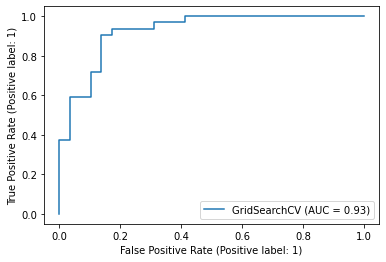

In [195]:
warnings.filterwarnings("ignore")
plot_roc_curve(log_gcv, x_test, y_test);


## Confusion matrix

In [199]:
confusion_matrix(y_test, y_pred)

array([[25,  4],
       [ 3, 29]], dtype=int64)

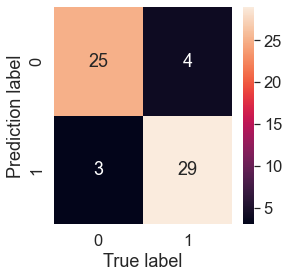

In [221]:
sns.set(font_scale=1.5)

fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True)
plt.xlabel("True label")
plt.ylabel("Prediction label");



In [222]:
# let get classification report, precistion, recall, F1-score..

In [230]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Finding predections using cross validation 

In [278]:
#  accuracy with cross-val
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8182513661202184

In [263]:
#  precision with cross-val
cv_pre = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8323425006892748

In [264]:
#  recall with cross-val
cv_rec = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.8606060606060606

In [265]:
#  f1 with cross-val
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8357066176727741

In [283]:
cv_met = pd.DataFrame({"Accuracy": cv_acc})
cv_met.T.plot.bar(titel="Cross-val classification")

TypeError: 'str' object is not callable

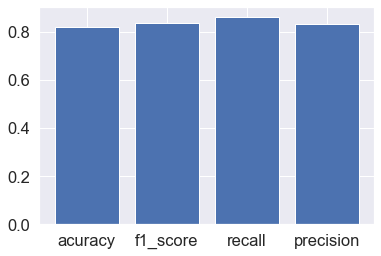

In [312]:
cv_met = {'acuracy': cv_acc, 'f1_score': cv_f1, 'recall': cv_rec, 'precision': cv_pre}
x=list(cv_met.keys())
y=list(cv_met.values())

plt.bar(range(len(cv_met)), y, tick_label=x);

## Feature importance 
* the most important or most contributed feature for logistic regression


In [318]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(x_train, y_train);
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [321]:
# matching cofficents with features and making a dict
feature_imp = dict(zip(data.columns, list(clf.coef_[0])))
feature_imp

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

## Visualizing feature importance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal')])

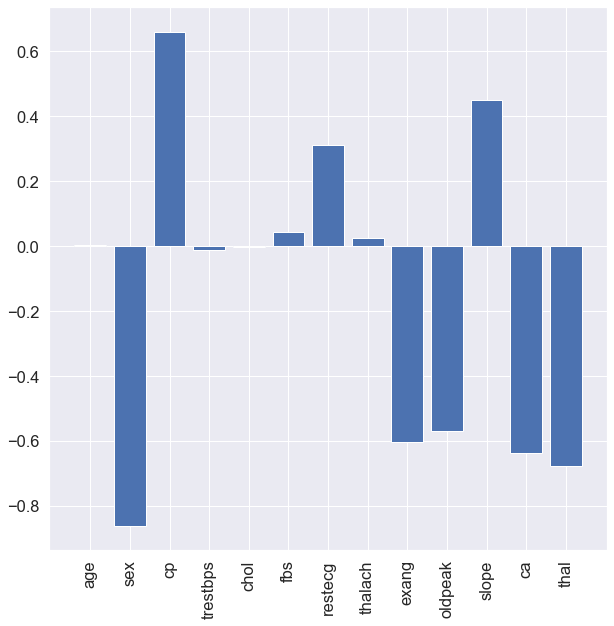

In [345]:
x=list(feature_imp.keys())
y=list(feature_imp.values())
fig, ax=plt.subplots(figsize=(10, 10))
plt.bar(range(len(feature_imp)), y, tick_label=x, width=0.80)
plt.xticks(rotation=90)


In [350]:
# sex has the higest negative evaluation on data acording to data
confusion_matrix(data.target, data.sex)

array([[ 24, 114],
       [ 72,  93]], dtype=int64)

In [351]:
# cp has the higest positive evaluation on data acording to data
confusion_matrix(data.target, data.cp)

array([[104,   9,  18,   7],
       [ 39,  41,  69,  16],
       [  0,   0,   0,   0],
       [  0,   0,   0,   0]], dtype=int64)

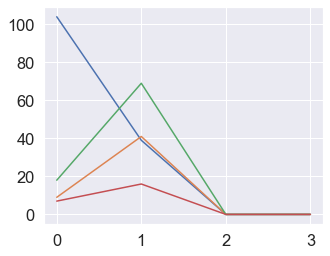

In [368]:
fig, ax=plt.subplots(figsize=(5, 4))
plt.plot(confusion_matrix(data.target, data.cp));

### Conclusion
* As we have evaluate a pretty good result for our machine learing model, which is around 88.52%.
* which is arroud out of 10 people 9 can be answered correctly
* Here I conclude my model. 